<a href="https://colab.research.google.com/github/sodiq-sulaimon/Preparations-for-TensorFlow-Developer-Certification/blob/main/Computer_vision_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the required library

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

2.13.0


In [2]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

LABEL: 8

IMAGE PIXEL ARRAY: 
[[  0   0   0   0   0   0   0   0   0   0   0   4   0  37 198   6   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0   8  98  41 113   0   2   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0  76  82   0 202   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   4   0 139  43   0 193  32   0   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 172   0   0 111  82   0   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4   0  61 139   0   0  43 115   0   4   0   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   6   0 143  82   0   0   0 122   0   2   4   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 198   8   0   0   0 108  39   0   4   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  43 202 

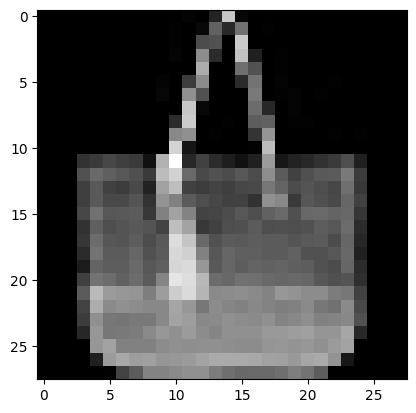

In [3]:
# Let's see what the training images look like as numpy arrays and images

# The index can be changed to see different images (0 to 6999)
index = 35

# Set the number of character per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f"LABEL: {training_labels[index]}")
print(f"\nIMAGE PIXEL ARRAY: \n{training_images[index]}")

plt.imshow(training_images[index], cmap='gray')


In [4]:
# The pixel values are between 0 and 255.
# Normalize the training and test pixel values to value values ranging from 0 to 1
training_images = training_images / 255.0
test_images = test_images / 255.0

In [5]:
# Build the classification model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="softmax")

])

In [6]:
# Declare sample inputs and convert to tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f"Input to softmax function: {inputs.numpy()}")

Input to softmax function: [[1. 3. 4. 2.]]


In [7]:
# Feed the input to a softmax activation
outputs = tf.keras.activations.softmax(inputs)
print(f"Output of the softmax activation: {outputs.numpy()}")

Output of the softmax activation: [[0.0320586  0.23688282 0.64391426 0.08714432]]


In [8]:
# Get the sum of all values after the softmax
sum_vals = tf.reduce_sum(outputs)
print(f"Sum of outputs: {sum_vals}")

Sum of outputs: 1.0


In [9]:
# Get the index with the maximun value
prediction = np.argmax(outputs)
print(f"Class with highest probability: {prediction}")

Class with highest probability: 2


In [10]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics= ["accuracy"])

In [12]:
# Train the model
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5011 - accuracy: 0.8242
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3756 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3371 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3139 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2960 - accuracy: 0.8900


In [13]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3598 - accuracy: 0.8728


[0.35980352759361267, 0.8727999925613403]

In [14]:
# Exercises
classifications = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [15]:
print(classifications[600])
print(f"Model prediction: {np.argmax(classifications[600])}")
print(f"Actual label: {test_labels[600]}")

[2.3888467e-02 5.2354106e-04 5.9746408e-01 1.2197865e-02 1.1064724e-01 2.2395384e-04 2.5176322e-01 1.6062870e-05 3.2657939e-03 9.7787488e-06]
Model prediction: 2
Actual label: 2
